<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="https://praktikum.yandex.ru/">     
           <img 
               src="https://yastatic.net/q/praktikum/v0.116.12-fix3-1580741332/static/apple-touch-icon.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Яндекс.Практикум</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2> Приоретизация гипотез и анализ результатов А/В тестирования<p>
    </h2></div>

## Описание проекта
**Контекст**
- Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Шаги выполнения проекта:<a id="beginning"></a>

  ### [Часть 1. Приоритизация гипотез.](#step1)

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Задачи:
  1. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step1_1)
  2. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step1_2)
  3. [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#step1_3)
 
 
  ### [Часть 2. Анализ A/B-теста*](#step2)
 
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задачи:
  Проанализируйте A/B-тест:
   1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#step2_1)
   2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#step2_2)
   3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#step2_3)
   4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#step2_4)
   5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#step2_5)
   6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#step2_6)
   7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных   пользователей.](#step2_7)
   8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#step2_8)
   9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#step2_9)
   10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#step2_10)
   11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#step2_11)
   12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#step2_12)
   13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#step2_13)
   14. [Примите решение по результатам теста и объясните его.](#step2_14)
       -*Варианты решений:*
     - 1. Остановить тест, зафиксировать победу одной из групп. 
     - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
     - 3. Продолжить тест.
     
### [Результаты и общие выводы](#step3)
  





## Часть 1. Приоритизация гипотез.<a id="step1"></a>

In [1]:
# импортируем все нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats

#обозначим, что хотим видеть все столбцы в датафреймах
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', -1)

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датафрейме нет пропусков, столбцы названы корректно, типы значений корректны

### Применение фреймворка ICE<a id="step1_1"></a>

In [4]:
#применим метод приоретизации ICE
hypo['ICE'] = (hypo['Impact']*hypo['Confidence'])/hypo['Efforts']
hypo['ICE'] = hypo['ICE'].astype('int')
print(hypo.loc[:, ['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользовате

[Вернуться к оглавлению](#beginning)

### Применение фреймворка RICE<a id="step1_2"></a>

In [5]:
#применим метод приоретизации RICE
hypo['RICE'] = (hypo['Reach']*hypo['Impact']*hypo['Confidence'])/hypo['Efforts']
hypo['RICE'] = hypo['RICE'].astype('int')
print(hypo.loc[:, ['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

### Вывод:<a id="step1_3"></a>
Приоритизация гипотез при применении RICE вместо ICE изменилась благодаря учету показателя REACH - охват аудитории при проведении теста, гипотезы с бОльшим охватом вышли на первые строчки.



[Вернуться к оглавлению](#beginning)

## Часть 2. Анализ A/B-теста:<a id="step2"></a>

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum()

0

В датафрейме нет пропусков и дубликатов, названия столбцов корректны, формат даты объект стоит заменить на формат даты.



In [9]:
# столбец end_date приведем к временному формату
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.duplicated().sum()

0

In [13]:
# столбец end_date приведем к временному формату
visitors['date'] = pd.to_datetime(visitors['date'])

Пропусков и дубликатов нет, названия столбцов корректны, типы данных корректны.



[Вернуться к оглавлению](#beginning)

### Задача 1:<a id="step2_1"></a>
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [14]:
#cоздадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders и избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [15]:
# Объявим переменную ordersAggregated, содержащую:
# дату;
# группу A/B-теста;
# число уникальных заказов в группе теста по указанную дату включительно;
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# суммарную выручку заказов в группе теста по указанную дату включительно
# отсортируем по столбцам 'date', 'group' в указанном порядке.

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [16]:
# Объявим переменную visitorsAggregated, содержащую:
# дату;
# группу A/B-теста;
# количество уникальных посетителей в группе теста по указанную дату включительно
# отсортируем по столбцам 'date', 'group' в указанном порядке.

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [17]:
# объединим visitorsAggregated и ordersAggregated и присвоим названия столбцам
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [18]:
# сохраним данные о датах, выручке и числе заказов в группе A
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueA.head(5)

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [19]:
# сохраним данные о датах, выручке и числе заказов в группе В
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]
cummulativeRevenueB.head(5)

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



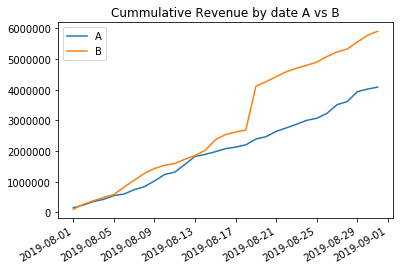

In [20]:
fig= plt.figure()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
fig.autofmt_xdate()
plt.title('Cummulative Revenue by date A vs B')
plt.legend()

In [21]:
#проверим данные о выручке на нормальность критерием Шапиро-Уилка
revenueA = orders[orders['group']=='A']['revenue']
revenueA

2       400  
7       1044 
8       13710
10      4008 
12      7370 
        ...  
1187    750  
1188    112  
1193    3190 
1194    10550
1195    100  
Name: revenue, Length: 557, dtype: int64

In [22]:
alpha = .05

results = st.shapiro(revenueA)
p_value = results[1] 

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [23]:
#проверим данные о выручке на нормальность критерием Шапиро-Уилка
revenueB = orders[orders['group']=='B']['revenue']
revenueB

0       1650  
1       730   
3       9759  
4       2308  
5       2210  
        ...   
1189    31550 
1190    8600  
1191    16490 
1192    6490  
1196    202740
Name: revenue, Length: 640, dtype: int64

In [24]:
alpha = .05

results = st.shapiro(revenueB)
p_value = results[1] 

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Действительно, в распределении выручки в обоих тестируемых группах присутствуют выбросы - распределение не нормальны, что подтверждает критерий Шапиро-Уилка.

 ### Вывод по задаче 1:
 Практически в начале теста куммулятивная выручка группы В вырвалась вперед, но, возможно, на это сильно повлияли выбросы, далее избавимся от них и проверим уже на "очищенных" данных. В распределении выручки в обоих тестируемых группах присутствуют выбросы - распределение не нормальны, что подтверждает критерий Шапиро-Уилка.
 


[Вернуться к оглавлению](#beginning)

### Задача 2:<a id="step2_2"></a>
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

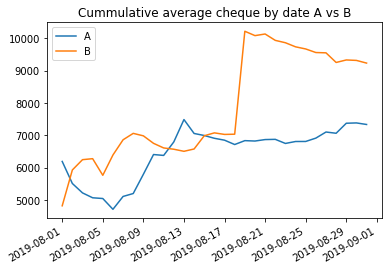

In [25]:
#разделим кумулятивную выручку на кумулятивное число заказов и построим график:
fig= plt.figure()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
fig.autofmt_xdate()
plt.title('Cummulative average cheque by date A vs B')

plt.legend()

 ### Вывод по задаче 2:
 Куммулятивные значения средних чеков в основном говорят о том, что группа В лидирует, но тем не менее стоит проанализировать влияние выбросов.
 


[Вернуться к оглавлению](#beginning)

### Задача 3:<a id="step2_3"></a>
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [26]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCummulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


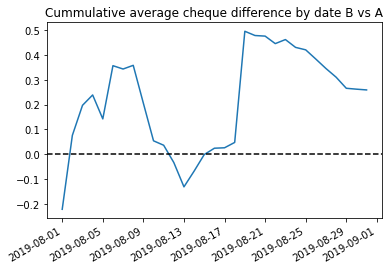

In [27]:
# cтроим отношение средних чеков
fig= plt.figure()
plt.plot(mergedCummulativeRevenue['date'], 
(mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
fig.autofmt_xdate()
plt.title('Cummulative average cheque difference by date B vs A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

 ### Вывод по задаче 3:
 На графике видны резкие резкие скачки, именно в эти даты скорее всего совершались аномально дорогие покупки. Но в целом видно, что разница в чеках группы В практически весь период в положительной зоне графика, значит чеки группы В в среднем были выше.
 


[Вернуться к оглавлению](#beginning)

### Задача 4:<a id="step2_4"></a>
Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [28]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [29]:
# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [30]:
# отделяем данные по группе В
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
cummulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


['2019-08-01', '2019-09-01', 0.025, 0.04]

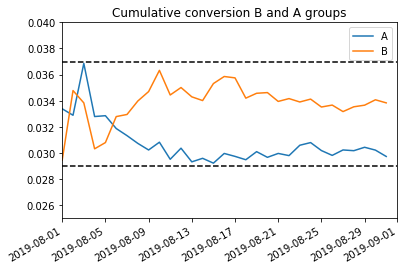

In [31]:
# строим графики
fig= plt.figure()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A'),
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B'),

plt.title('Cumulative conversion B and A groups')
plt.legend()
plt.axhline(y=0.029, color='black', linestyle='--')
plt.axhline(y=0.037, color='black', linestyle='--')
fig.autofmt_xdate()
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04])

 ### Вывод по задаче 4:
 Куммулятивная конверсия колеблется в небольшом диапазоне, различия всего примерно в 1%, но тем не менее стабильно примерно с 10 августа на этот 1 процент выигрывает группа В.
 
 

[Вернуться к оглавлению](#beginning)

### Задача 5:<a id="step2_5"></a>
Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [32]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCummulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


['2019-08-01', '2019-09-01', -0.2, 0.3]

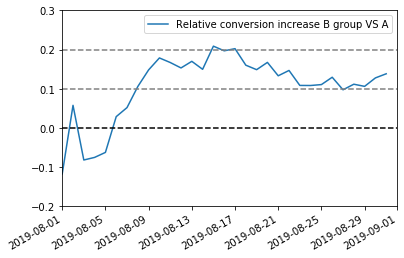

In [33]:
fig= plt.figure()
plt.plot(mergedCummulativeConversions['date'], 
mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, 
label="Relative conversion increase B group VS A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
plt.axhline(y= 0.1, color='grey', linestyle='--')
fig.autofmt_xdate()
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])

 ### Вывод по задаче 5:
 Относительное различие куммулятивной конверсии говорит о том, что прирост конверсии "В" практически с начала теста (6-7 августа) и до конца исследуемых данных находится в положительном диапазоне 10-20%, и хотя различие в 20% мы видели довольно непродолжительный отрезок времени 2-3 дня, в целом раздичие не ниже, чем на 10% наблюдается стабильно.
 


[Вернуться к оглавлению](#beginning)

### Задача 6:<a id="step2_6"></a>
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [34]:
# сформируем список клиентов с количеством заказов по visitorId, посчитам уникальные номера клиентов в списке заказов
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [35]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers - наша ось Х длы построение точесного графика
x_values = pd.Series(range(0,len(ordersByUsers)))
x_values

0       0   
1       1   
2       2   
3       3   
4       4   
       ..   
1026    1026
1027    1027
1028    1028
1029    1029
1030    1030
Length: 1031, dtype: int64

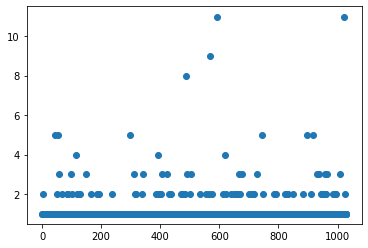

In [36]:
#строим точечную диаграмму
plt.scatter(x_values, ordersByUsers['orders'])

 ### Вывод по задаче 6:
Пользователей сделавших более 3 заказов совсем мало, вероятно, это выбросы, посчитаем выборочные процентили, чтобы убедиться.



[Вернуться к оглавлению](#beginning)

### Задача 7:<a id="step2_7"></a>

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [37]:
np.percentile(ordersByUsers['orders'], [ 95, 98, 99])

array([2., 3., 4.])

 ### Вывод по задаче 7:
 Не более 5% пользователей сделали больше 2 заказов и не больше 1% сделали больше 4. Дополнительно посмотрели рубеж в 3 заказа - это всего 2% пользователей, поэтому считаю, что оптимально считать количество заказов свыше 2 - аномальным количеством, т.е. выбросом.


[Вернуться к оглавлению](#beginning)

### Задача 8:<a id="step2_8"></a>
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [38]:
#Отсортируем заказы по убыванию
orders_sorted = orders.sort_values(by='revenue',ascending=False)
orders_sorted

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


In [39]:
#добавим столбец для создания оси Х точесного графика
x_values = pd.Series(range(0,len(orders['revenue'])))


[0, 1200, 0, 150000]

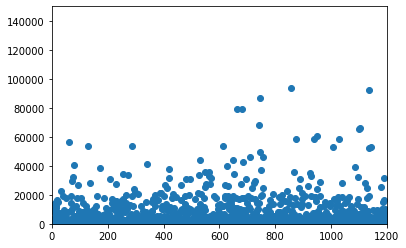

In [40]:
# строим точечтный график по суммам заказов
fig= plt.figure()
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 150000])


 ### Вывод по задаче 8:
 Пользователей сделавших заказов на сумму более 40 000  совсем мало, вероятно, это выбросы, посчитаем выборочные процентили, чтобы убедиться.

[Вернуться к оглавлению](#beginning)

### Задача 9: <a id="step2_9"></a>
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [41]:
np.percentile(orders['revenue'], [95, 98, 99])

array([28000. , 44133.2, 58233.2])

 ### Вывод по задаче 9:
 Не более 5% пользователей сделали заказы на сумму более 28 тыс рублей. Дополнительно посмотрели рубеж в 2%  - это заказы на сумму свыше 44 тыс рублей, лишь 1% заказов дороже 58 тыс рублей, поэтому, взвесив данные на графике и процентили, считаю, что оптимально считать заказы свыше 28 тыс - аномально дорогими, т.е. выбросами.
 


[Вернуться к оглавлению](#beginning)

### Задача 10: <a id="step2_10"></a>
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [42]:
# отсортируем пользователей группы А,  совершивших хотя бы 1 заказ, для них будет указано число заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [43]:
# отсортируем пользователей группы В,  совершивших хотя бы 1 заказ, для них будет указано число заказов.
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [44]:
# отфильтруем визиты по группе А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(5)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [45]:
# отфильтруем визиты по группе В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head(5)

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [46]:
# посчитаем визиты группы А нарастающим итогом
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(5)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [47]:
# посчитаем визиты группы В нарастающим итогом
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(5)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [48]:
# отфильтруем визиты и выручку по группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head(5)

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [49]:
# отфильтруем визиты и выручку по группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head(5)

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [50]:
#рассчитаем накопительным итогом количество заказов и выручку по группе А
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head(5)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [51]:
#рассчитаем накопительным итогом количество заказов и выручку по группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head(5)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [52]:
# объединим заказы, выручку по дням и накопительным итогом разбитые по группам в один датафрейм
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [53]:
# присоединим к юзерам которые сделали хотя бы один заказ в группе А к тем, кто не сделал ни одного
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA


0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [54]:
# присоединим к юзерам которые сделали хотя бы один заказ в группе В к тем, кто не сделал ни одного
sampleB = pd.concat([ordersByUsersB['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [55]:
# применим тест Манна-Уитни для проверки наличия статистически значимых различий конверсии по результатам теста
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))



0.00840


In [56]:
# выведем относительное различие в конверсии между группами.
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.138


 ### Вывод по задаче 10:
 Статистическая значимость различий в конверсии между группами по «сырым» данным значительно меньше 5%, это означает, что статистически значимые различия в данных есть и нулевую гипотезу о том, что конверсии одинаковы мы отвергаем. А относительный прирост конверсии группы В по отношению к А составляет почти 14%.
 


[Вернуться к оглавлению](#beginning)

### Задача 11: <a id="step2_11"></a>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [57]:
# применим тест Манна-Уитни для проверки наличия статистически значимых различий в средних чеках по результатам теста
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


0.365


In [58]:
# выведем относительное различие в средних чеках между группами.
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


 ### Вывод по задаче 11:
 Статистическая значимость различий в средних группами по «сырым» данным значительно выше 5%, а именно 36,5%, а это означает, что статистически значимые различия в данных нет с вероятностью 63,5% и нулевую гипотезу о том, что средние чеки одинаковы мы не отвергаем.
 А относительный прирост средних чеков группы В по отношению к А составляет почти 26%. В таком случае необходимо убрать из анализа аномалии, которые искажают результат.
 


[Вернуться к оглавлению](#beginning)

### Задача 12: <a id="step2_12"></a>
Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [59]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithManyOrders.head(5)

18     199603092 
23     237748145 
68     611059232 
146    1230306981
189    1614305549
Name: userId, dtype: int64

In [60]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
usersWithExpensiveOrders.head(5)

60     4256040402
77     787824685 
78     3288820196
131    2254586615
173    2953427180
Name: visitorId, dtype: int64

In [61]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [62]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered.head(5)

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [63]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleBFiltered.head(5)

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [64]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))


0.00667


In [65]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.172


 ### Вывод по задаче 12:
 Статистическая значимость различий в конверсии между группами по «чистым» данным значительно меньше 5%, это означает, что статистически значимые различия в данных есть и нулевую гипотезу о том, что конверсии одинаковы мы отвергаем. А относительный прирост конверсии группы В по отношению к А составляет более 17%.
 


[Вернуться к оглавлению](#beginning)

### Задача 13: <a id="step2_13"></a>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [66]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.360


In [67]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.023


 ### Вывод по задаче 13:
 Статистическая значимость различий в средних группами по «чистым» данным значительно выше 5%, а именно 36%, а это означает, что статистически значимых различий в данных нет с вероятностью 64% и нулевую гипотезу о том, что средние чеки одинаковы мы не отвергаем.
 А относительный прирост средних чеков группы В по отношению к А составляет всего -2,3%. Что говорит о том, что относительный прирост средних чеко в в группе В незначительно отрицательный, статистической значимости эти различия не имеют и мы не отвергаем гипотезу о там, что средние чеки остались одинаковыми.
 


[Вернуться к оглавлению](#beginning)

### Задача 14: <a id="step2_14"></a>
Примите решение по результатам теста и объясните его. 
  
    *Варианты решений:*
     - 1. Остановить тест, зафиксировать победу одной из групп. 
     - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
     - 3. Продолжить тест.

 ### Вывод по задаче 14:
 На основании того, что мы имеем статистически значимые различия в конверсии на очищенных данных есть с вероятностью более 99%, а относительный прирост конверсии группы В по отношению к А составляет более 17% и он статистически значим, соответственно однозначно можно полагать, что конверсия в группе В выше. 
 
По средним чекам на основе чистых данных статистически значимых различий не выявлено, и согласно тесту Манна-Уитни вероятность того, что средние чеки остались одинаковыми равна 64%. Косвенно об этом говорит и низкая цифра относительного прироста -2,3%, эти различия статистически незначимы и являются случайными.

**Наше решение:** останавливаем тест и признаем победу за группой В - она дала бизнесу большую конверсию, а соответственно и большую выручку. 



[Вернуться к оглавлению](#beginning)

## Общий вывод<a id="step3"></a>




 ### *Часть 1. Приоритизация гипотез.*


- Задача
 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
 
**Вывод:** 
Приоритизация гипотез при применении RICE вместо ICE изменилась благодаря учету показателя REACH - охват аудитории при проведении теста, гипотезы с бОльшим охватом вышли на первые строчки.


 
 ### *Часть 2. Анализ A/B-теста*
 
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задачи:

  Проанализируйте A/B-тест:
  
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
  
   **Вывод по задаче 1:**
 Практически в начале теста куммулятивная выручка группы В вырвалась вперед, но, возможно, на это сильно повлияли выбросы, далее избавимся от них и проверим уже на "очищенных" данных. В распределении выручки в обоих тестируемых группах присутствуют выбросы - распределение не нормальны, что подтверждает критерий Шапиро-Уилка.
 
 
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
   
   **Вывод по задаче 2:**
 Куммулятивные значения средних чеков в основном говорят о том, что группа В лидирует, но тем не менее стоит проанализировать влияние выбросов.
 
 
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   
   **Вывод по задаче 3:**
 На графике видны резкие резкие скачки, именно в эти даты скорее всего совершались аномально дорогие покупки. Но в целом видно, что разница в чеках группы В практически весь период в положительной зоне графика, значит чеки группы В в среднем были выше.
 
 
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
   
   **Вывод по задаче 4:**
 Куммулятивная конверсия колеблется в небольшом диапазоне, различия всего примерно в 1%, но тем не менее стабильно примерно с 10 августа на этот 1 процент выигрывает группа В.
 
 
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
   
  **Вывод по задаче 5:**
 Относительное различие куммулятивной конверсии говорит о том, что прирост конверсии "В" практически с начала теста (6-7 августа) и до конца исследуемых данных находится в положительном диапазоне 10-20%, и хотя различие в 20% мы видели довольно непродолжительный отрезок времени 2-3 дня, в целом раздичие не ниже, чем на 10% наблюдается стабильно.
 
 
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
   
   **Вывод по задаче 6:**
Пользователей сделавших более 3 заказов совсем мало, вероятно, это выбросы, посчитаем выборочные процентили, чтобы убедиться.


7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных   пользователей.
   
   **Вывод по задаче 7:**
 Не более 5% пользователей сделали больше 2 заказов и не больше 1% сделали больше 4. Дополнительно посмотрели рубеж в 3 заказа - это всего 2% пользователей, поэтому считаю, что оптимально считать количество заказов свыше 2 - аномальным количеством, т.е. выбросом.
 
 
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
   
   **Вывод по задаче 8:**
 Пользователей сделавших заказов на сумму более 40 000  совсем мало, вероятно, это выбросы, посчитаем выборочные процентили, чтобы убедиться.
 
 
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
   
   **Вывод по задаче 9:**
 Не более 5% пользователей сделали заказы на сумму более 28 тыс рублей. Дополнительно посмотрели рубеж в 2%  - это заказы на сумму свыше 44 тыс рублей, лишь 1% заказов дороже 58 тыс рублей, поэтому, взвесив данные на графике и процентили, считаю, что оптимально считать заказы свыше 30 тыс - аномально дорогими, т.е. выбросами.
 
 
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
   
   **Вывод по задаче 10:**
 Статистическая значимость различий в конверсии между группами по «сырым» данным значительно меньше 5%, это означает, что статистически значимые различия в данных есть и нулевую гипотезу о том, что конверсии одинаковы мы отвергаем. А относительный прирост конверсии группы В по отношению к А составляет почти 14%.
 
 
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
   
   **Вывод по задаче 11:**
 Статистическая значимость различий в средних группами по «сырым» данным значительно выше 5%, а именно 36,5%, а это означает, что статистически значимые различия в данных нет с вероятностью 63,5% и нулевую гипотезу о том, что средние чеки одинаковы мы не отвергаем.
 А относительный прирост средних чеков группы В по отношению к А составляет почти 26%. В таком случае необходимо убрать из анализа аномалии, которые искажают результат.
 
 
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
   
   **Вывод по задаче 12:**
 Статистическая значимость различий в конверсии между группами по «чистым» данным значительно меньше 5%, это означает, что статистически значимые различия в данных есть и нулевую гипотезу о том, что конверсии одинаковы мы отвергаем. А относительный прирост конверсии группы В по отношению к А составляет более 17%.
 
 
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
   
   **Вывод по задаче 13:**
 Статистическая значимость различий в средних группами по «чистым» данным значительно выше 5%, а именно 36%, а это означает, что статистически значимых различий в данных нет с вероятностью 64% и нулевую гипотезу о том, что средние чеки одинаковы мы не отвергаем.
 А относительный прирост средних чеков группы В по отношению к А составляет всего -2,3%. Что говорит о том, что относительный прирост средних чеко в в группе В незначительно отрицательный, статистической значимости эти различия не имеют и мы не отвергаем гипотезу о там, что средние чеки остались одинаковыми.
 
 
14. Примите решение по результатам теста и объясните его. 
   
   **Вывод по задаче 14:**
 На основании того, что мы имеем статистически значимые различия в конверсии на очищенных данных есть с вероятностью более 99%, а относительный прирост конверсии группы В по отношению к А составляет более 17% и он статистически значим, соответственно однозначно можно полагать, что конверсия в группе В выше. 
 
По средним чекам на основе чистых данных статистически значимых различий не выявлено, и согласно тесту Манна-Уитни вероятность того, что средние чеки остались одинаковыми равна 64%. Косвенно об этом говорит и низкая цифра относительного прироста -2,3%, эти различия статистически незначимы и являются случайными.

**Наше решение:** останавливаем тест и признаем победу за группой В - она дала бизнесу большую конверсию, а соответственно и большую выручку. 

[Вернуться к оглавлению](#beginning)